# Introduction


Now: Naive Bayes, measure gut feeling

Experimental Goal: Emperical evaluation matching

Problem : 
* Transfer Problem: model bias, train charity and want to apply model to news
* Choice Target Variable: Target Variable : Cause (37) or category (11)

Design:
2) Compare performance of several approaches.


Choice of Algo:
* Imbalance: overcome imbalance using model insensitve to class imbalance
* NB, SVM, Random Forest, XGBoost, Sequential NN

Document Representation
term frequ
tfidf
word2vec
doc2vec
HashingVectorizer??? what is it



# Python Imports

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# Data Set

In [2]:
df = pd.read_csv('/Users/stewarta/repos/charity-filter-evaluation/evaluation/data/charity_navigator.csv')
df.head()

,Unnamed: 0,category,cause,charityid,mission,tagline
0,0,arts culture humanities,museums,9745,the utah museum of contemporary art advances a...,utah premiere venue for contemporary art
1,1,health,diseases disorders and disciplines,8857,the national mps society exists to find cures ...,support for families research for cure
2,2,health,patient and family support,14464,the ronald mcdonald house of san francisco rmh...,the house that love built
3,3,human services,social services,4177,the mission of the national federation of the ...,live the life you want
4,4,animals,zoos and aquariums,3718,the oldest zoo in texas the fort worth zoo was...,strengthening the bond between humans and the ...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 6 columns):
Unnamed: 0    9119 non-null int64
category      9119 non-null object
cause         9119 non-null object
charityid     9119 non-null int64
mission       8654 non-null object
tagline       8699 non-null object
dtypes: int64(2), object(4)
memory usage: 427.5+ KB


# Data Preparation 

## Uniformative Columns

In [3]:
print(df.columns)
df.drop(['Unnamed: 0','charityid'], axis=1, inplace=True)
df.head()

Index(['Unnamed: 0', 'category', 'cause', 'charityid', 'mission', 'tagline'], dtype='object')


,category,cause,mission,tagline
0,arts culture humanities,museums,the utah museum of contemporary art advances a...,utah premiere venue for contemporary art
1,health,diseases disorders and disciplines,the national mps society exists to find cures ...,support for families research for cure
2,health,patient and family support,the ronald mcdonald house of san francisco rmh...,the house that love built
3,human services,social services,the mission of the national federation of the ...,live the life you want
4,animals,zoos and aquariums,the oldest zoo in texas the fort worth zoo was...,strengthening the bond between humans and the ...


## Missing Data

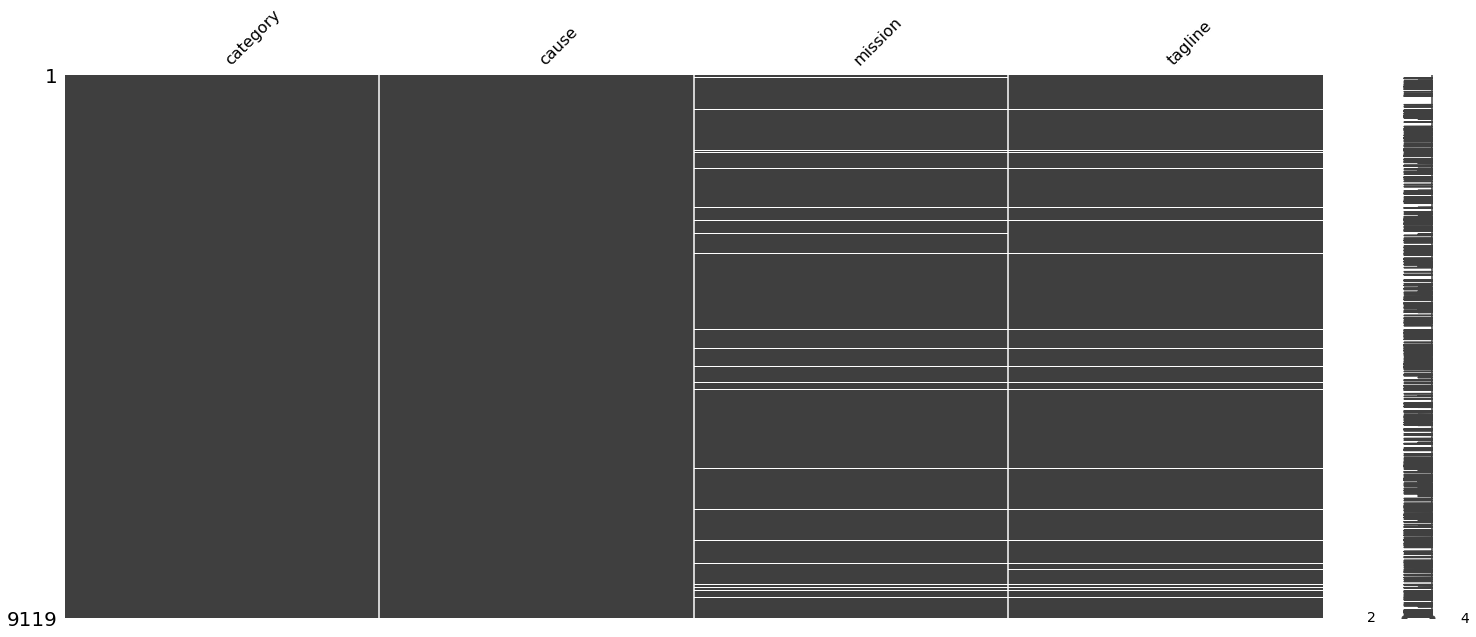

In [4]:
msno.matrix(df)

In [5]:
## Drop Empty Rows
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8638 entries, 0 to 9118
Data columns (total 4 columns):
category    8638 non-null object
cause       8638 non-null object
mission     8638 non-null object
tagline     8638 non-null object
dtypes: object(4)
memory usage: 337.4+ KB


## Class Imbalance

We can upsample to handle the class imbalance or use an algorithm (e.g.: Tree-based) that is insensitve to the class imbalance.

In [6]:
df['category'].value_counts()
#df['cause'].value_counts()

human services                2430
arts culture humanities       1228
health                         894
community development          807
education                      671
international                  626
animals                        485
religion                       465
environment                    447
human and civil rights         370
research and public policy     215
Name: category, dtype: int64

## Feature Encoding

In [7]:
# merge all text to create a document
df['text'] = df.mission + df.tagline
df.head()

,category,cause,mission,tagline,text
0,arts culture humanities,museums,the utah museum of contemporary art advances a...,utah premiere venue for contemporary art,the utah museum of contemporary art advances a...
1,health,diseases disorders and disciplines,the national mps society exists to find cures ...,support for families research for cure,the national mps society exists to find cures ...
2,health,patient and family support,the ronald mcdonald house of san francisco rmh...,the house that love built,the ronald mcdonald house of san francisco rmh...
3,human services,social services,the mission of the national federation of the ...,live the life you want,the mission of the national federation of the ...
4,animals,zoos and aquariums,the oldest zoo in texas the fort worth zoo was...,strengthening the bond between humans and the ...,the oldest zoo in texas the fort worth zoo was...


## Convert Target to Integer


In [8]:
target = 'category'

le = preprocessing.LabelEncoder()
le.fit(df[target])

print(le.classes_)
df['target'] = le.transform(df[target]) 

df.head()


['animals' 'arts culture humanities' 'community development' 'education'
 'environment' 'health' 'human and civil rights' 'human services'
 'international' 'religion' 'research and public policy']


,category,cause,mission,tagline,text,target
0,arts culture humanities,museums,the utah museum of contemporary art advances a...,utah premiere venue for contemporary art,the utah museum of contemporary art advances a...,1
1,health,diseases disorders and disciplines,the national mps society exists to find cures ...,support for families research for cure,the national mps society exists to find cures ...,5
2,health,patient and family support,the ronald mcdonald house of san francisco rmh...,the house that love built,the ronald mcdonald house of san francisco rmh...,5
3,human services,social services,the mission of the national federation of the ...,live the life you want,the mission of the national federation of the ...,7
4,animals,zoos and aquariums,the oldest zoo in texas the fort worth zoo was...,strengthening the bond between humans and the ...,the oldest zoo in texas the fort worth zoo was...,0


# Build Model : Charity Only

## Train and Test Sets

In [9]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, test_size=0.20, random_state=seed)

## Pipelines

In [10]:
# convert to count,  word2vec, doc2vec

pipe_mnb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

pipe_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svm.SVC(decision_function_shape='ovo', random_state=seed)),
])


pipe_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(tol=None,random_state=seed)),
])

## Grid Search Parameters

In [12]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

grid_params_mnb = [{
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__fit_prior': (True, False),
}] 


grid_params_svm = [{
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__kernel': ['linear', 'rbf', 'poly'], 
    'clf__C': param_range,
}]

grid_params_sgd = [{
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__penalty': ['l1', 'l2','elasticnet'],
    'clf__loss' : ('hinge', 'squared_hinge'),
    'clf__alpha': (1e-2, 1e-3),
}]

## Grid Search

In [14]:
# Construct grid searches
jobs = -1

gs_mnb = GridSearchCV(
    estimator=pipe_mnb,
    param_grid=grid_params_mnb,
    scoring='accuracy',
    cv=10) 

gs_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=10)


gs_sgd = GridSearchCV(
    estimator=pipe_sgd,
    param_grid=grid_params_sgd,
    scoring='accuracy',
    cv=10, 
    n_jobs=jobs)


# List of pipelines for ease of iteration
grids = [gs_mnb, gs_svm, gs_sgd]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Multinomial Naive Bayes', 1: 'Support Vector Machine', 
             2: 'Stocastic Gradient Descent'}

# Evaluation Performance

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params 
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
#dump_file = 'best_gs_pipeline.pkl'
#joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: Multinomial Naive Bayes
Best params: {'clf__fit_prior': False, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
Best training accuracy: 0.560
Test set accuracy score for best params: 0.560 

Estimator: Support Vector Machine
